# Birch Clustering.
Author: Pooja Umathe <br>


# Introduction

We have a loans dataset to perform BIRCH clustering. In this analysis, we will observe different clusters in our dataset. The hardness of the problem is to be able to find the clusters in this very large dataset. 

The following methodology is applied to find the clusters.

- Importing the dataset
- Train/ Test splitting
- Standardizing
- BIRCH modelling


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
dataset = pd.read_csv('Loans.csv')

In [48]:
dataset.head()

,Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
0,F,0.0,397,1000,450.0
1,F,0.0,403,500,225.0
2,F,0.0,408,1000,450.0
3,F,0.0,408,2000,900.0
4,F,0.0,411,5000,2250.0


Getting the data as in below.

In [49]:
X = dataset.iloc[:, 1:4]
y = dataset.loc[:, 'Approval']

In [50]:
print('type check: \nX: {}\ny: {}'.format(type(X), type(y)))
X.shape

type check: 
X: <class 'pandas.core.frame.DataFrame'>
y: <class 'pandas.core.series.Series'>


(150302, 3)

## Modeling

Below, we are starting to split our dataset into train and test datasets in order to observe the clusters with in the two samples. 

In [51]:
# splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Standardizing the features is applied in order to gather variables in the same scaling level.

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X)
X_test_scaled = sc.transform(X)

Birch build a tree that for the given set of data. There are CF Subclusters that hold information about the data, therefore it doesn't need to keep the data.

According to the modeling parameters, following thresold levels are tested in finding the best model outcome. Below the thresold level is 0.5

n_clusters : 1


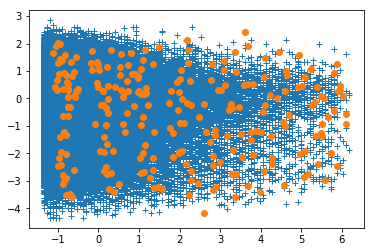

In [53]:
# birch clustering
from sklearn.cluster import Birch, MiniBatchKMeans, KMeans
brc = Birch(threshold=0.5, n_clusters=4, branching_factor=50)
brc.fit(X_train_scaled)
labels = brc.predict(X_test)

# result
n_clusters = np.unique(labels).size
print("n_clusters : %d" % n_clusters)

c = brc.subcluster_centers_
plt.plot(X_train_scaled[:,0], X_train_scaled[:,1], '+')
plt.plot(c[:,0], c[:,1], 'o')
plt.show()

Here, the thresold level is 1. The thresold levels greater then 1 is resulting inconsistencies within the clusters and graphical representation.

n_clusters : 2


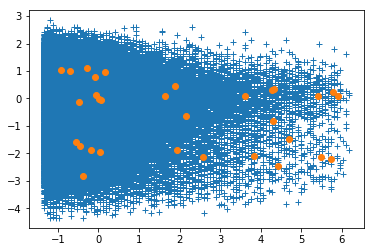

In [54]:
# thresold set to 1
brc = Birch(threshold=1, n_clusters=2, branching_factor=50)
birch_model = brc.fit(X_train_scaled)
labels = brc.predict(X_test)
# result
n_clusters = np.unique(labels).size
print("n_clusters : %d" % n_clusters)

c = brc.subcluster_centers_
plt.plot(X_train_scaled[:,0], X_train_scaled[:,1], '+')
plt.plot(c[:,0], c[:,1], 'o')
plt.show()

In [55]:
brc = Birch(threshold=0.5, n_clusters=2, branching_factor=50)
birch_model = brc.fit(X_train_scaled)
labels = brc.predict(X_test)
# result
n_clusters = np.unique(labels).size
print("n_clusters : %d" % n_clusters)

n_clusters : 1


The following graph is the representation of subcluster centers in the dataset.

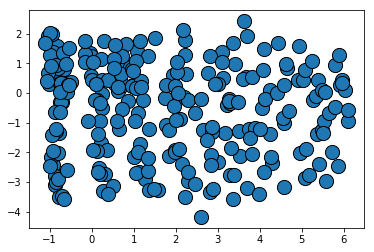

In [56]:
# Labeling the clusters
centers = birch_model.subcluster_centers_
# Draw white circles at cluster centers

plt.scatter(centers[:, 0], centers[:, 1], marker='o', alpha=1, s=200, edgecolor='k')

## Clusters for Training Dataset

Below, we are representing silhouette graph along with the clusters that is indicated with a scatter chart. Here is the result of our BIRCH model and the clusters. 

** Due to long calculations, only a sample of entries is used to create the graphs. The inconsistensies may occur.

For n_clusters = 2 The average silhouette_score is : 0.6372093607522337
For n_clusters = 3 The average silhouette_score is : 0.5795591217078951


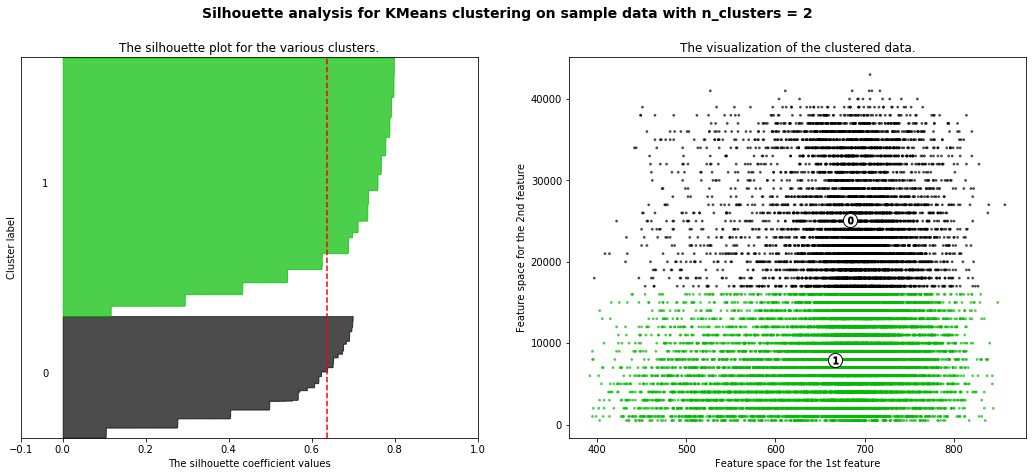

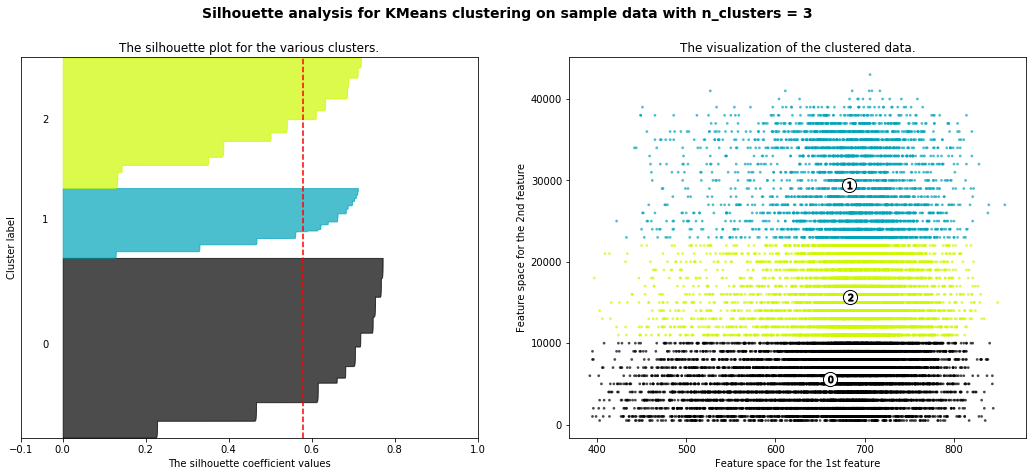

In [57]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X = X_train.iloc[:20000, 1:4].values
range_n_clusters = [2, 3]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Clusters for Test Dataset

For comparison, in below, we are representing silhouette graph along with the clusters that is indicated with a scatter chart for the test dataset. Here is the result of our BIRCH model and the clusters. 

** Due to long calculations, only a sample of entries is used to create the graphs. The inconsistensies may occur.

For n_clusters = 2 The average silhouette_score is : 0.6384230911846853
For n_clusters = 3 The average silhouette_score is : 0.5786808223476246


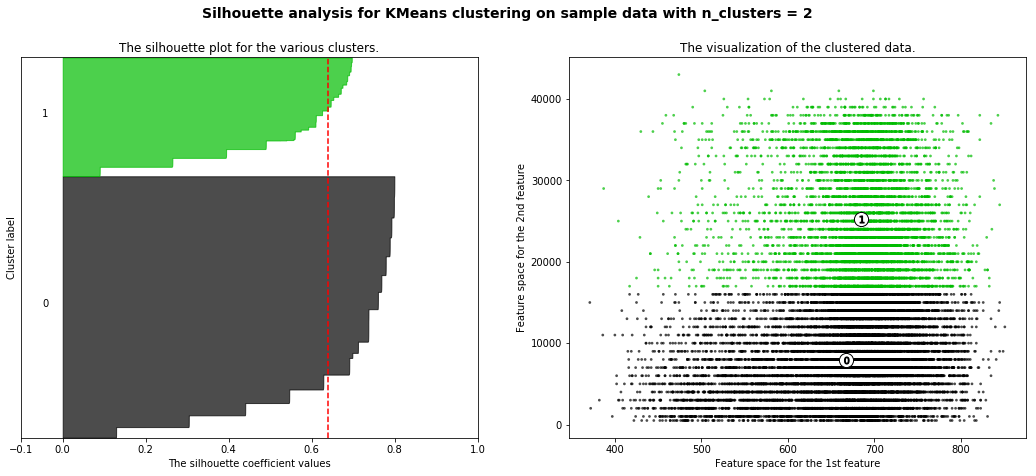

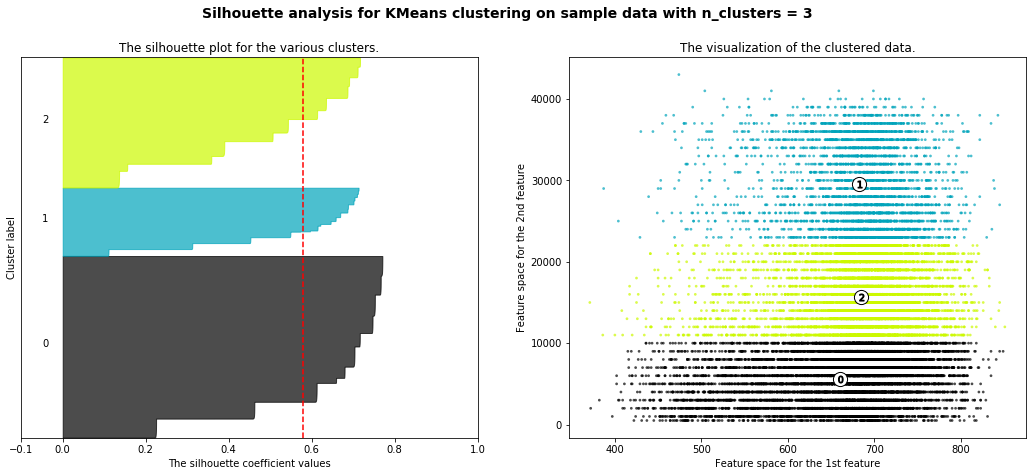

In [58]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X = X_test.iloc[:20000, 1:4].values
range_n_clusters = [2, 3]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Conclusion

In this project, we observed that in order to find clusters in the dataset, we can utilize BIRCH model. This report is the illustration of how the model is used with python from sklearn library.